In [1]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-upwind-cfl)

In [2]:
[x, Dx] = diffper(400, [0, 1]);
c = 2;  
ivp = ode(ODEFcn = @(t, u) -c * (Dx*u));
ivp.RelativeTolerance = 1e-5;
ivp.InitialTime = 0;
u_init = exp( -80*(x - 0.5).^2 );
ivp.InitialValue = u_init;

[u, sol] = solutionFcn(ivp, 0, 2);

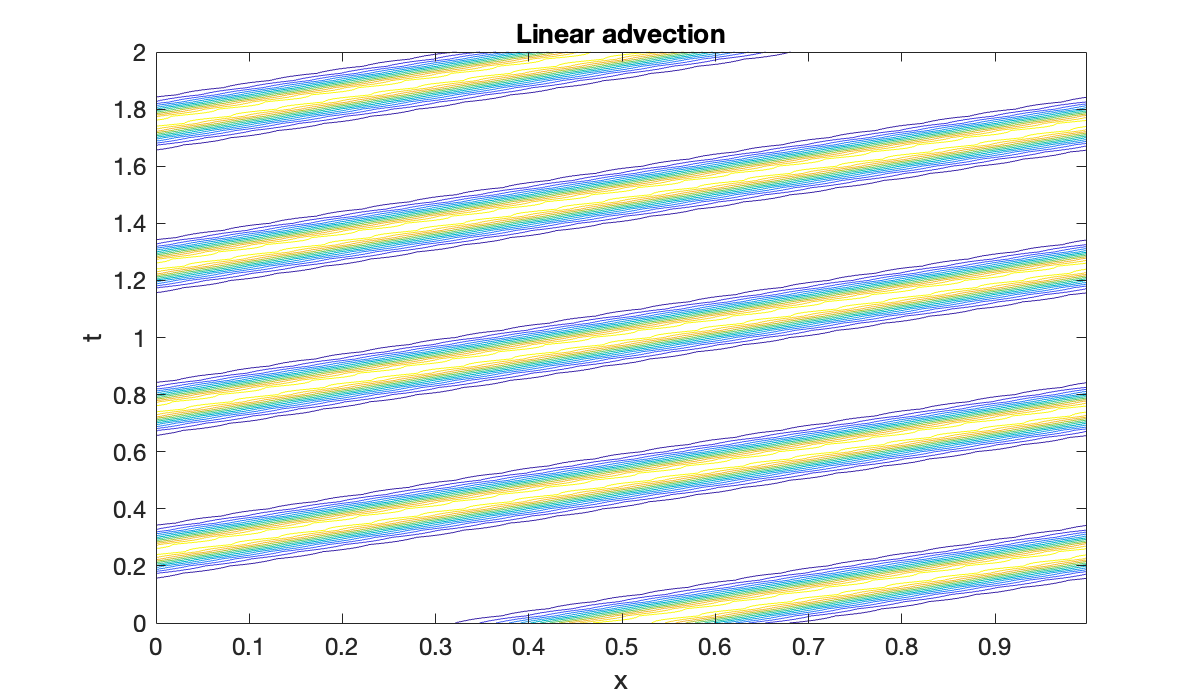

In [3]:
clf
t = linspace(0, 2, 81);
contour(x, t, u(t)', 12)
xlabel('x'),  ylabel('t')
title('Linear advection')

In the space-time plot above, you can see the initial hump traveling rightward at constant speed. It fully traverses the domain once for each integer multiple of $t=1/2$. 

If we cut $h$ by a factor of 2 (i.e., double $m$), then the CFL condition suggests that the time step should be cut by a factor of 2 also.

In [4]:
num_steps_400 = length(sol.Time) - 1

[x, Dx] = diffper(800, [0, 1]);
ivp.ODEFcn = @(t, u) -c * (Dx*u);
ivp.InitialValue = exp( -80*(x - 0.5).^2 );
[u, sol] = solutionFcn(ivp, 0, 2);

num_steps_800 = length(sol.Time) - 1
ratio = num_steps_800 / num_steps_400

num_steps_400 = 1139

num_steps_800 = 2489

ratio = 2.1853